In [ ]:
# install pre-requisites
%pip install matplotlib
%pip install pydot
%pip install tqdm

You should consider upgrading via the '/home/shubham/anaconda3/envs/cs224n/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/shubham/anaconda3/envs/cs224n/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/shubham/anaconda3/envs/cs224n/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import necessary modules
import mutorch
from mutorch import nn, optim, losses
from tqdm.notebook import tqdm
import numpy as np
import random
# visualization
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# set the random seed
random.seed(0)
np.random.seed(0)

## Working with individual nodes

Node(name=sigmoid+rv6s, op=sigmoid, value=0.4611816223646706, grad=1.0)


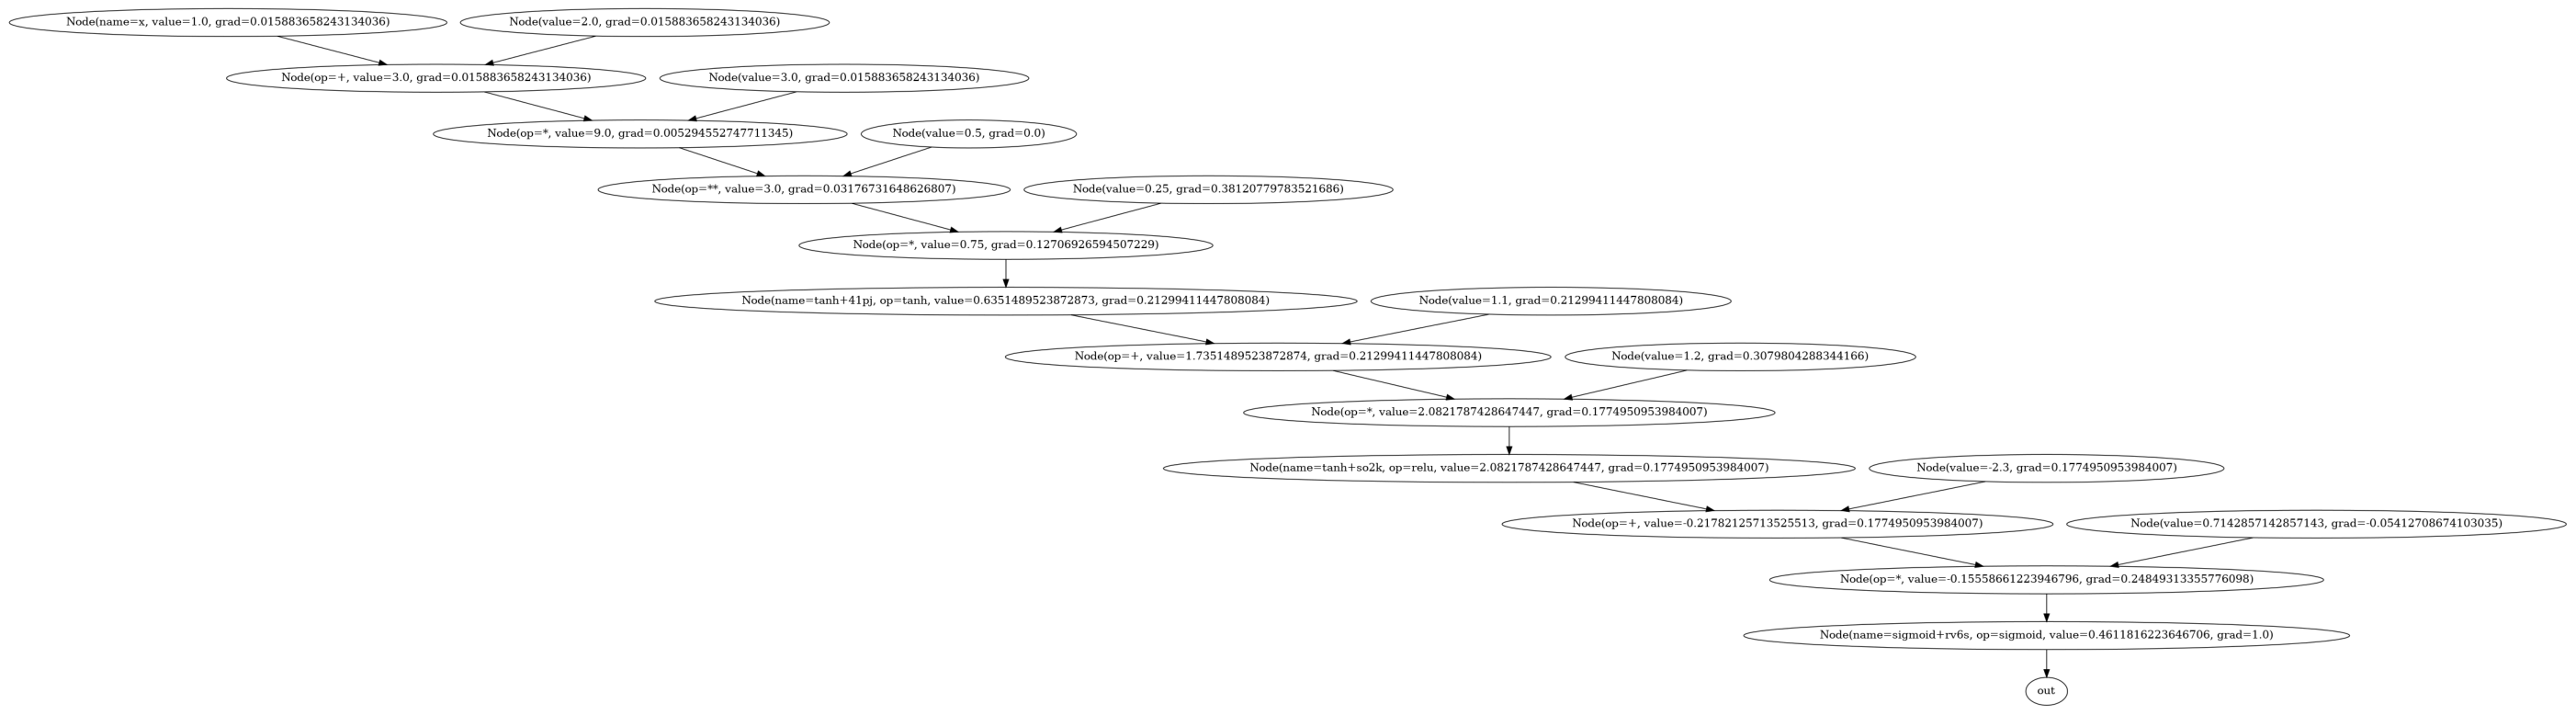

In [ ]:
from mutorch import Node

# define a node and perform some operations
x = Node(1, name='x', requires_grad=True)
x = x + 2
x = x * 3
x = x ** 0.5
x = x / 4
x = nn.Tanh()(x)
y = (x + 1.1) * 1.2
x = nn.ReLU()(y)
x = (x - 2.3) / 1.4
x = nn.Sigmoid()(x)
# perform a backward pass
x.backward()
# print the final node and gradients
print(x)

# draw the computational graph
x.draw_graph(filename='media/node_graph')
graph = plt.imread('media/node_graph.png')

plt.figure(figsize=(50, 50))
plt.imshow(graph)
plt.axis('off')
plt.show()

## Working with Tensors

In [ ]:
# define tensors and perform some operations
x = mutorch.Tensor([[1,2,3,4,5],
                    [2,3,4,5,6]])
w = mutorch.Tensor([[1.0, 1.1, 1.2, 1.3, 1.4], 
                    [2.0, 2.1, 2.2, 2.3, 2.4]])
bias = mutorch.Tensor([[1.0, 2.0, 3.0, 4.0, 5.0],
                       [2.0, 3.0, 4.0, 5.0, 6.0]])  
z = ( x * w ) + bias
z = z / 2.2
z = nn.Tanh()(z)
# perform backward pass
z.backward()
# print the final tensor and gradients
print(z)

Tensor(shape=(2, 5), 
	data=[[Node(op=tanh, value=0.7206956331664799, grad=1.0), Node(op=tanh, value=0.9570090018249322, grad=1.0), Node(op=tanh, value=0.9950547536867305, grad=1.0), Node(op=tanh, value=0.9995337191162993, grad=1.0), Node(op=tanh, value=0.9999634182845244, grad=1.0)]
	[Node(op=tanh, value=0.9914827858961799, grad=1.0), Node(op=tanh, value=0.999574229965115, grad=1.0), Node(op=tanh, value=0.9999823226304781, grad=1.0), Node(op=tanh, value=0.9999993881955461, grad=1.0), Node(op=tanh, value=0.9999999823460692, grad=1.0)])], requires_grad=True)


## Building a Sequential model

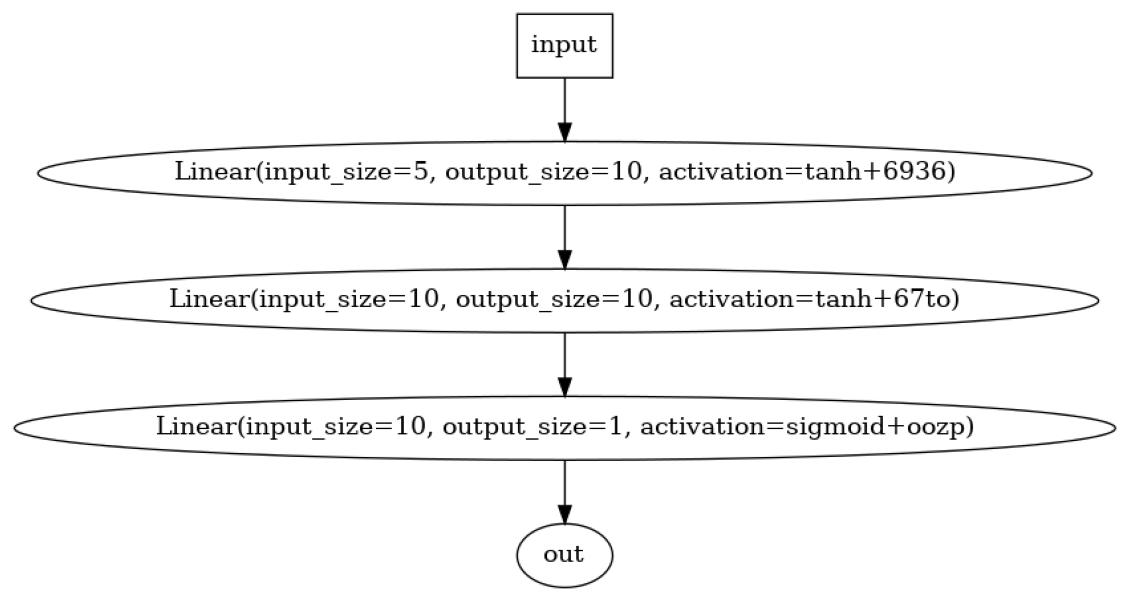

In [ ]:
# define a sequential neural network with non-linear activation
model = nn.Sequential(
            nn.Linear( input_size=5, output_size=10, activation=nn.Tanh() ),
            nn.Linear( input_size=10, output_size=10, activation=nn.ReLU() ),
            nn.Linear( input_size=10, output_size=1, activation=nn.Sigmoid() )
        )
# define an example input tensor with batch size 2
x = [[1,2,3,4,5], [2,3,4,5,6]]
# perform a forward pass
y = model( x )
# y.backward()
# visualize the model
model.draw_graph(filename='media/sequential_graph')
graph = plt.imread('media/sequential_graph.png')

plt.figure(figsize=(20, 20))
plt.imshow(graph)
plt.axis('off')
plt.show()

## Defining a dataset, optimizer, and training the model

In [ ]:
## build a toy dataset
# input tensor
x = mutorch.Tensor([[0.6, -0.35,  0.47,  0.71,  0.12],
                    [0.3,  0.45, -0.67, -0.89,  0.23],
                    [0.5,  0.65,  0.87,  0.99,  0.34],
                    [0.7, -0.85,  0.97, -0.11,  0.45],
                    [0.9, -0.01, -0.13,  0.25, -0.56],
                    [-0.2, 0.32, -0.54,  0.76,  0.98]])
# ground truth
y = mutorch.Tensor([[0.0], 
                    [0.0], 
                    [0.0], 
                    [1.0], 
                    [1.0], 
                    [1.0]])

In [ ]:
# define an optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = losses.MSELoss()
epochs = 500

# print model parameters
print(f'{"#" * 20} Model parameters {"#" * 20}')
print(model)
print(f'Number of parameters: {model.num_parameters()}')

#################### Model parameters ####################
Sequential(
	Linear(input_size=5, output_size=10, activation=tanh+6936)
	Linear(input_size=10, output_size=10, activation=tanh+67to)
	Linear(input_size=10, output_size=1, activation=sigmoid+oozp))
Number of parameters: 181


In [ ]:
## training the model
# print ground truth and initial prediction
print('Ground truth: ', y.items())
print('Model output before training: ', model(x).items())
print(f'{"#" * 20} Starting model training...')

pbar = tqdm(range(epochs))
for epoch in pbar:
    # reset the gradients
    optimizer.zero_grad()
    # perform a forward pass
    y_pred = model(x)
    # compute the loss
    loss = loss_fn(y_pred, y)
    # perform a backward pass
    loss.backward()
    # update the parameters
    optimizer.step()
    # update the progress bar
    pbar.set_description(f'Epoch {epoch+1}/{epochs} - Loss: {loss.item():.6f}')

print(f'{"#" * 20} Training complete!')
print('Model output after training: ', model(x).items())

Ground truth:  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0]
Model output before training:  [0.7441989149767927, 0.7557556987580156, 0.6813329283057257, 0.8470190212601998, 0.6932120601630575, 0.5927583800302989]
#################### Starting model training...


  0%|          | 0/500 [00:00<?, ?it/s]

#################### Training complete!
Model output after training:  [0.010169717402702975, 0.005972497733295931, 0.0003775212499147564, 0.9896434497847614, 0.9907021940864532, 0.9932092963752471]


In [ ]:
# save the model
model_weights = 'weights.pt'
model.save(model_weights)

# define a new model and load weights
model = nn.Sequential(
            nn.Linear( input_size=5, output_size=10, activation=nn.Tanh() ),
            nn.Linear( input_size=10, output_size=10, activation=nn.ReLU() ),
            nn.Linear( input_size=10, output_size=1, activation=nn.Sigmoid() )
        )
model.load(model_weights)
print('Model output after loading weights: ', model(x).items())

Model output after loading weights:  [0.010169717402702975, 0.005972497733295931, 0.0003775212499147564, 0.9896434497847614, 0.9907021940864532, 0.9932092963752471]


# Train a model on realistic classification dataset

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# set the random seed
random.seed(0)
np.random.seed(0)

# create a dataset with 1000 samples and 10 features corresponding to 4 classes
def create_dataset(n_samples, n_features, n_classes, validation_split=0.2):
    # get centroid of 'n_classes' clusters
    centroids = [[random.uniform(-1, 1) for _ in range(n_features)] for _ in range(n_classes)]
    # get the standard deviation of each cluster
    stds = [random.uniform(0.1, 1) for _ in range(n_classes)]
    # create the dataset
    X = []
    y = []
    for _ in range(n_samples):
        # choose a random cluster
        i = random.randint(0, n_classes - 1)
        # get a random point from the cluster
        X.append([random.gauss(centroids[i][j], stds[i]) for j in range(n_features)])
        # convert the class to a one-hot vector
        y.append([1 if i == j else 0 for j in range(n_classes)])
    # split the dataset into training and validation sets
    X_train, X_val = X[:int(n_samples * (1 - validation_split))], X[int(n_samples * (1 - validation_split)):]
    y_train, y_val = y[:int(n_samples * (1 - validation_split))], y[int(n_samples * (1 - validation_split)):]
    return X_train, y_train, X_val, y_val

In [ ]:
# compute the accuracy of the model
def compute_accuracy(y_gt, y_pred):
    # convert the true labels to class labels
    y_gt = np.argmax(np.array(y_gt), axis=1)
    # convert the predictions to class labels
    y_pred = np.argmax(np.array(y_pred), axis=1)
    # compute the accuracy
    return sum([1 if y_pred[i] == y_gt[i] else 0 for i in range(len(y_gt))]) / len(y_gt)

In [ ]:
# visualize the dataset by projecting it onto a 2D space and coloring the points by their class
def visualize_data(X, y):
    # project the dataset onto a 2D space
    X = np.array(X)
    y = np.array(y)
    # convert y to a list of class labels
    y = np.array([np.argmax(y[i]) for i in range(len(y))])
    if len(X[0]) > 2:
        pca = PCA(n_components=2)
        X = pca.fit_transform(X)
    X = pca.fit_transform(X)
    # plot the dataset
    plt.figure(figsize=(8,8))
    scatter = plt.scatter(x=X[:, 0], y=X[:, 1], 
                            c=y, 
                            cmap=plt.cm.Spectral,
                            s=75,
                            edgecolors='k')
    # add legend
    plt.legend(handles=scatter.legend_elements()[0], 
               labels=[f'Class: {i}' for i in range(max(y)+1)],
               loc='upper right',
               fontsize=12)
    # add legend
    plt.axis('off')
    plt.tight_layout()
    plt.show()

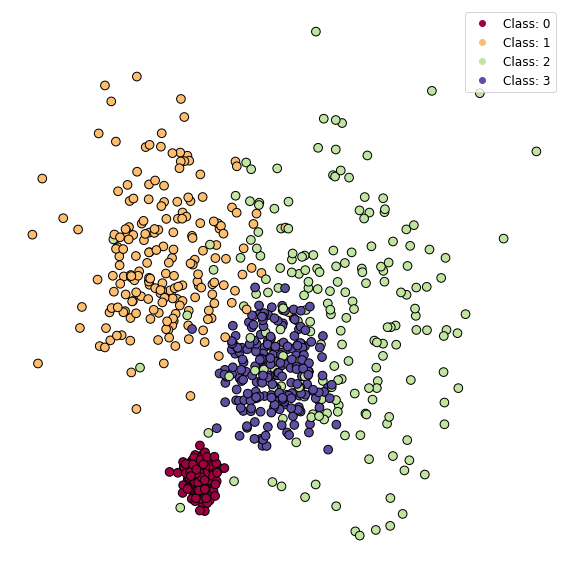

In [ ]:
# create the dataset
n_features = 10
n_classes = 4
n_samples = 1000
X_train, y_train, X_val, y_val = create_dataset(n_samples, n_features, n_classes)
# visualize the dataset
visualize_data(X_train, y_train)

In [ ]:
# create the model
def train(X_train, y_train, X_val, y_val, epochs, batch_size, lr):
    n_features = len(X_train[0])
    n_classes = len(y_train[0])
    # create the model
    model = nn.Sequential(
        nn.Linear(n_features, 16, activation=nn.ReLU()),
        nn.Linear(16, 16, activation=nn.Tanh()),
        nn.Linear(16, n_classes, activation=nn.Sigmoid())
    )

    # define training parameters
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = losses.MSELoss()

    # train the model
    for epoch in range(epochs):
        gt, pred = [], []
        pbar = tqdm(range(0, len(X_train), batch_size))
        for step in pbar:
            # get the batch
            X_batch = mutorch.Tensor(X_train[step:step + batch_size])
            y_batch = mutorch.Tensor(y_train[step:step + batch_size])
            # reset the gradients
            optimizer.zero_grad()
            # forward pass
            y_pred = model(X_batch)
            # compute the loss
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            loss.backward()
            # update the parameters
            optimizer.step()
            # reset the gradients
            optimizer.zero_grad()
            # log accuracy
            gt += y_batch.detach()
            pred += y_pred.detach()
            acc = compute_accuracy(gt, pred)
            # update the progress bar
            pbar.set_description(f'Epoch {epoch+1}/{epochs} - Step: {(step) // batch_size}/{len(X_train) // batch_size} - Loss: {loss.item():.6f} - Acc: {acc*100.:.2f}%')

    # compute the accuracy of the model
    print(f'Computing the accuracy of the model on validation set...')
    accuracy = compute_accuracy(y_val, model(X_val).detach())
    print(f'Prediction accuracy of the model on validation set: {accuracy * 100:.2f}%')

    return model

In [ ]:
# train the model
model = train(X_train, y_train, X_val, y_val, epochs=3, batch_size=4, lr=0.01)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Computing the accuracy of the model on validation set...
Prediction accuracy of the model on validation set: 94.00%


In [20]:
# visualize decision boundaries on a 2-dimensional multi-class dataset
def visualize_decision_boundaries(filename='media/decision_boundaries.png'):
    n_samples = 2000
    n_features = 2
    n_classes= 4
    # create a two-dimensional dataset with 4 classes and 2000 samples
    X_train, y_train, X_val, y_val = create_dataset(n_samples=n_samples, 
                                                    n_features=n_features, 
                                                    n_classes=n_classes)
    # train the model on the dataset
    model = train(X_train, 
                  y_train, 
                  X_val, 
                  y_val, 
                  epochs=1, 
                  batch_size=16, 
                  lr=0.01)
    # compute the model prediction on validation set
    y_pred = model(mutorch.Tensor(X_val)).detach()
    # convert the predictions to class labels
    y_pred = np.argmax(np.array(y_pred), axis=1)
    # create a grid of points and get the predictions of the model
    x_min, x_max = np.min(np.array(X_val)[:, 0]), np.max(np.array(X_val)[:, 0])
    y_min, y_max = np.min(np.array(X_val)[:, 1]), np.max(np.array(X_val)[:, 1])
    delta_ = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max+delta_, delta_), np.arange(y_min, y_max+delta_, delta_))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    y_grid = model(mutorch.Tensor(X_grid.tolist())).detach()
    y_grid = np.argmax(np.array(y_grid), axis=1)
    # plot the decision boundaries
    plt.figure(figsize=(10, 10), facecolor='white')
    plt.contourf(xx, yy, y_grid.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.5)
    scatter = plt.scatter(np.array(X_val)[:, 0], np.array(X_val)[:, 1], 
                            c=y_pred, 
                            cmap=plt.cm.Spectral,
                            s=75,
                            edgecolors='k')
    # add legend
    plt.legend(handles=scatter.legend_elements()[0], 
               labels=[f'Class: {i}' for i in range(n_classes)],
               loc='upper right',
               fontsize=12)

    plt.axis('off')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

Computing the accuracy of the model on validation set...
Prediction accuracy of the model on validation set: 67.50%


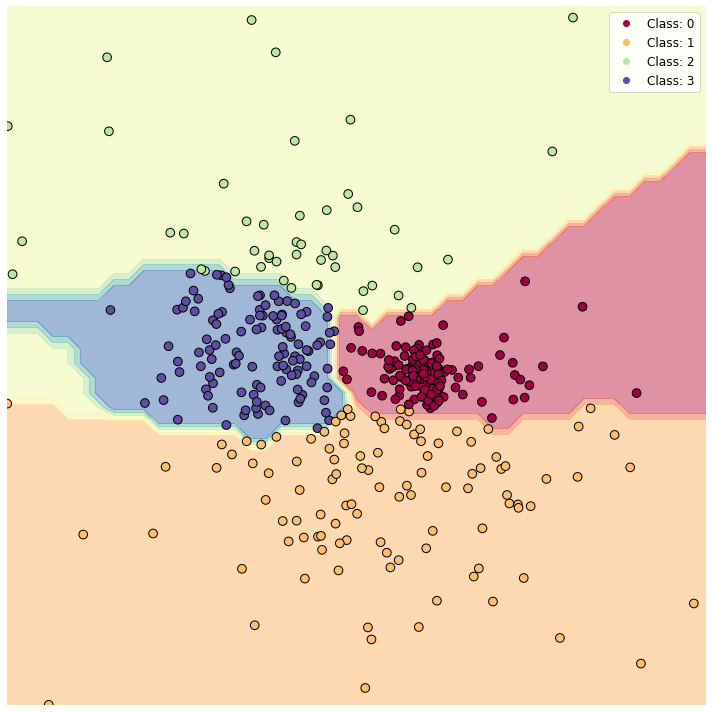

In [21]:
visualize_decision_boundaries('media/decision_boundaries.png')